## Step 1 | Data Pre-Processing

### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import itertools
import seaborn as sns
import matplotlib.ticker as tick
import matplotlib.patches as patches
import matplotlib.pyplot as plt
%matplotlib inline

### Importing the dataset

In [2]:
df = pd.read_csv('D:\Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.isnull().sum()

### Splitting the dataset into the Training set and Test set

In [5]:
#X = df['EstimatedSalary']
X = df.iloc[:,2:4]
y = df['Purchased']
print(X.shape)
print(y.shape)

(400, 2)
(400,)


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=21)

### Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#X = df['EstimatedSalary'].values.reshape(-1, 1)
#y = df['Purchased'].values
scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [9]:
print(X_train.std())

1.0


In [10]:
X_test = scaler.transform(X_test)

In [11]:
print(X_test.std())

1.0476512331319388


## Step 2 | Logistic Regression Model

### Fitting Logistic Regression to the Training set

In [12]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(X_train, y_train)

LogisticRegression()

## Step 3 | Predection

In [13]:
from sklearn.metrics import confusion_matrix
y_pred = regressor.predict(X_test)

In [14]:
print(regressor.intercept_)
print(regressor.coef_)

[-0.93722653]
[[2.04534306 1.18128442]]


## Step 4 | Evaluating The Predection

### Making the Confusion Matrix

In [15]:
print("Confusion Metrix for this model is: ")
print(confusion_matrix(y_test,y_pred))

Confusion Metrix for this model is: 
[[65  2]
 [12 21]]


In [16]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.86


## Visualization

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


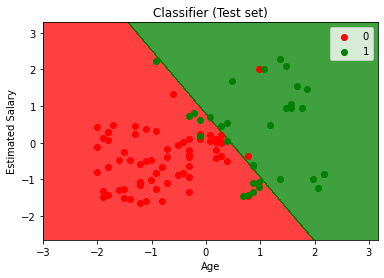

In [17]:
#Now we have to visualize the performance of our model test dataset
from matplotlib.colors import ListedColormap
x_set,y_set=X_test,y_test
X1,X2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))

plt.contourf(X1,X2,regressor.predict(
             np.array([X1.ravel(), X2.ravel()]).T).reshape(
             X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
      
plt.title('Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


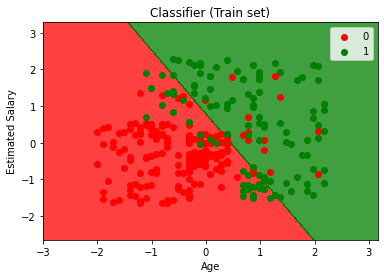

In [18]:
#Now we have to visualize the performance of our model train dataset
from matplotlib.colors import ListedColormap
x_set,y_set=X_train,y_train
X1,X2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))

plt.contourf(X1,X2,regressor.predict(
             np.array([X1.ravel(), X2.ravel()]).T).reshape(
             X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
      
plt.title('Classifier (Train set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()